In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from matplotlib.ticker import MaxNLocator
import pycountry
%matplotlib inline


In [2]:
def reputationPlot(df):
    repCol = df.iloc[:, 1]
    repCol = repCol[repCol > 0]

    stats = {
        'min': repCol.min(),
        'q1': repCol.quantile(0.25),
        'median': repCol.median(),
        'mean': repCol.mean(),
        'q3': repCol.quantile(0.75),
        'max': repCol.max()
    }
    plt.boxplot(repCol, vert=False)
    plt.title("Reputation Boxplot")
    plt.xlabel("Reputation")
    plt.grid(True)

    for label, val in stats.items():
        plt.axvline(val, linestyle='--', label=f'{label}: {val:.1f}')

    plt.legend(loc='upper right')
    plt.show()

In [3]:
def logScaledViewsHistogram(df, index):
    views = pd.to_numeric(df.iloc[:, index], errors='coerce').dropna()
    views = views[views > 0]  # remove zeros to avoid log issues
    plt.hist(views, bins=100, edgecolor='black')
    plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))

    plt.yscale('log')
    plt.title("Views Distribution (Log-Scaled)")
    plt.xlabel("Views")
    plt.ylabel("Frequency (log scale)")
    plt.grid(True)
    plt.show()

In [4]:
def zoomedViewsHistogram(df, index):
    views = pd.to_numeric(df.iloc[:, index], errors='coerce').dropna()
    views = views[(views > 0) & (views <= 2400)]
    plt.hist(views, bins=50, edgecolor='black')
    plt.title("Views Distribution (0–2400 range)")
    plt.xlabel("Views")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [5]:
def topNCommon(df, n):
    locations = df.iloc[:, 6].dropna()
    unique = locations.unique()
    top_locations = locations.value_counts().head(n)

    with open("unique_locations.txt", "w") as f:
        for loc in unique:
            f.write(f"{loc}\n")

    plt.barh(top_locations.index[::-1], top_locations.values[::-1])
    plt.title(f"Top {n} Most Common User Locations")
    plt.xlabel("Number of Users")
    plt.ylabel("Location")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
PATH = "Users.csv"
df = pd.read_csv(PATH)

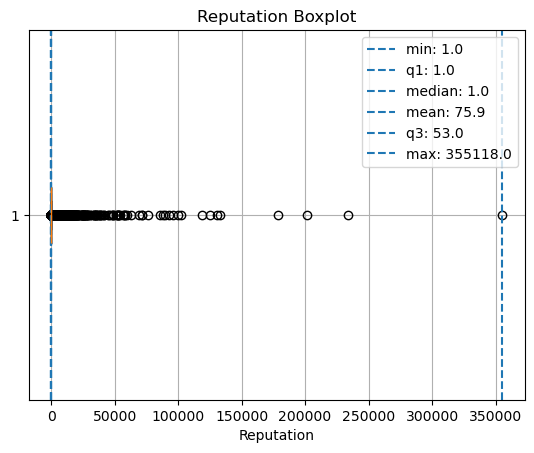

In [22]:
reputationPlot(df)


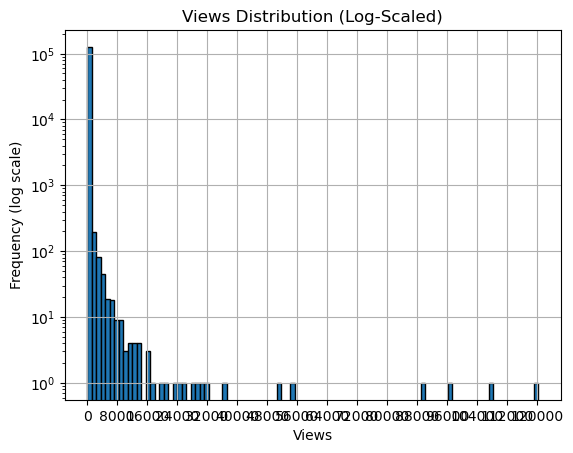

In [23]:
logScaledViewsHistogram(df, 8)


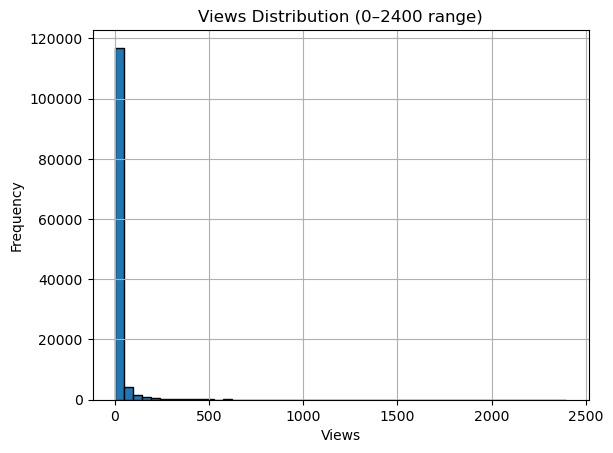

In [13]:
zoomedViewsHistogram(df, 8)


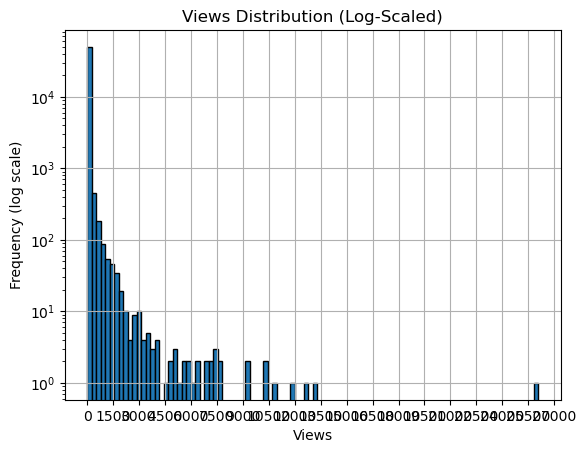

In [14]:
logScaledViewsHistogram(df, 9)  # Upvotes


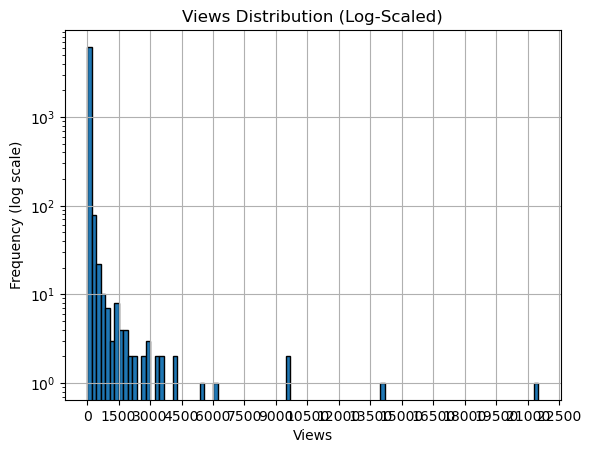

In [15]:
logScaledViewsHistogram(df, 10) # Downvotes


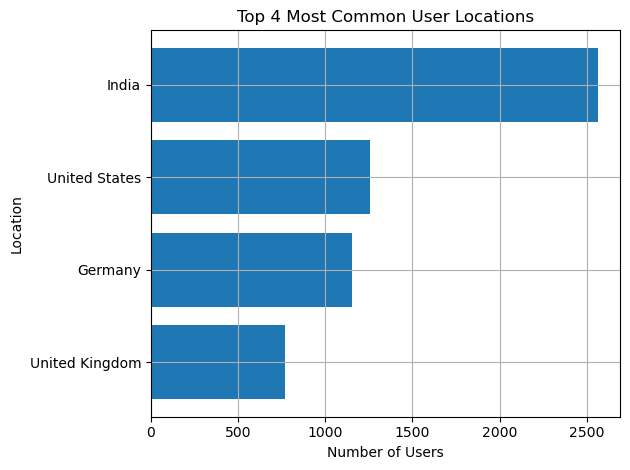

In [16]:
topNCommon(df, 4)